# Task 6: K-Nearest Neighbors (KNN) Classification
## Objective: Understand and implement KNN for classification problems using the Iris dataset.

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
# Load the Dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Drop Id column and check for nulls
df.drop('Id', axis=1, inplace=True)
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Encode target class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Try different K values and evaluate performance
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.2f}")

K = 1, Accuracy = 0.97
K = 2, Accuracy = 1.00
K = 3, Accuracy = 1.00
K = 4, Accuracy = 1.00
K = 5, Accuracy = 1.00
K = 6, Accuracy = 1.00
K = 7, Accuracy = 1.00
K = 8, Accuracy = 1.00
K = 9, Accuracy = 1.00
K = 10, Accuracy = 1.00
K = 11, Accuracy = 1.00
K = 12, Accuracy = 1.00
K = 13, Accuracy = 1.00
K = 14, Accuracy = 1.00
K = 15, Accuracy = 1.00
K = 16, Accuracy = 1.00
K = 17, Accuracy = 1.00
K = 18, Accuracy = 0.97
K = 19, Accuracy = 0.97
K = 20, Accuracy = 0.97


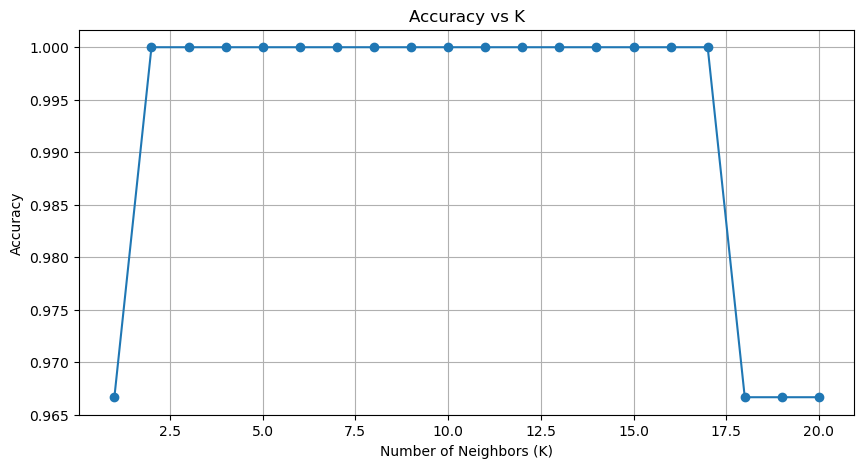

In [10]:
# Plot Accuracy vs K
plt.figure(figsize=(10,5))
plt.plot(range(1, 21), accuracies, marker='o')
plt.title('Accuracy vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

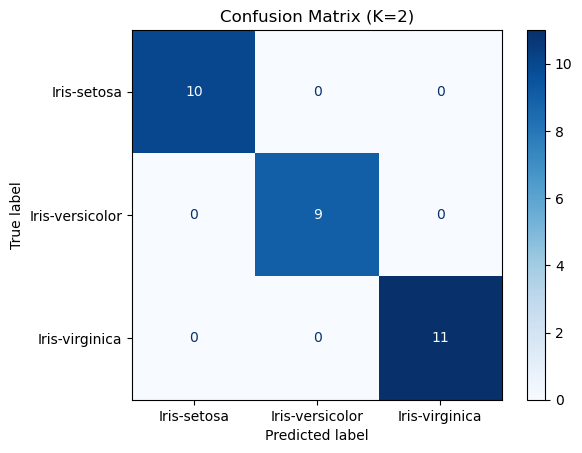

In [11]:
# Final Model and Confusion Matrix for best K
best_k = np.argmax(accuracies) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()

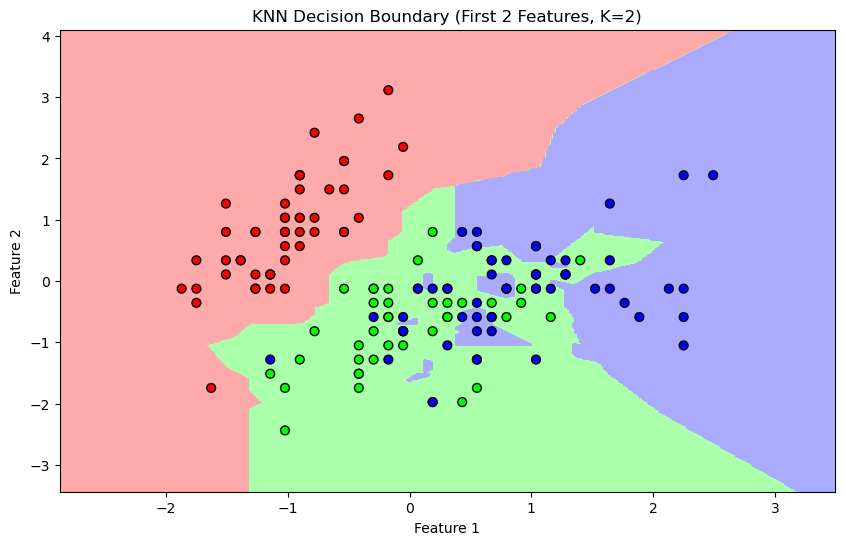

In [12]:
# Visualize Decision Boundary using first two features
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
plt.title(f"KNN Decision Boundary (First 2 Features, K={best_k})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()